In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.use('Agg')

In [2]:
# Load training data
train_data = pd.read_pickle('Cleaned_Data/train.pkl')

In [10]:
train_data.head(10)

,Date,Customer_Code,Customers_Country_Residence,Sex,Age,Date_Acc_Open,New_customer_index,Customer_Seniority,Primary_Customer,Customer_Type_Beginning_Month,...,Mortgage,Pensions1,Loans,Taxes,Credit_card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28,1375586,ES,H,35.0,2015-01-12,0.0,0.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,ES,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,ES,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,ES,H,22.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,ES,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,ES,H,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,ES,H,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,ES,H,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,ES,H,24.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,ES,H,23.0,2012-08-10,0.0,35.0,1.0,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0


In [17]:
train_data = train_data[(train_data['Date']==pd.to_datetime('2015-01-28')) | (train_data['Date']==pd.to_datetime('2015-02-28'))]

In [18]:
len(train_data)

1232486

In [19]:
# Columns
train_data.columns

Index(['Date', 'Customer_Code', 'Customers_Country_Residence', 'Sex', 'Age',
       'Date_Acc_Open', 'New_customer_index', 'Customer_Seniority',
       'Primary_Customer', 'Customer_Type_Beginning_Month',
       'Customer_Relation_Type_Beginning_Month', 'Residence_Index',
       'Foreigner_Index', 'Channel_Customer_join', 'Deceased_Index',
       'Address_Type', 'Province_Code', 'Province_Name', 'Activity_Index',
       'Household_Income', 'Segmentation', 'Saving_Account', 'Guarantees',
       'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
       'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
       'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions2', 'Direct_Debit'],
      dtype='object')

In [20]:
# Numeric features
numeric_cols = ['Age','Customer_Seniority','Household_Income']
# Not categorical features
not_categorical_cols = ['Date','Date_Acc_Open','Customer_Code']
 
categorical = ['Customers_Country_Residence','']

# Y
y = ['Saving_Account', 'Guarantees',
       'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
       'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
       'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions2', 'Direct_Debit']

df_numeric = train_data[numeric_cols]
df_categorical = train_data[list(set(train_data.columns)-set(numeric_cols)-set(not_categorical_cols)-set(y))]

In [21]:
# Keep only the base categorical features in the data
to_remove_from_categorical= ['Customers_Country_Residence','Primary_Customer','Customer_Type_Beginning_Month','Channel_Customer_join','Deceased_Index','Address_Type','Province_Code']
df_categorical.drop(to_remove_from_categorical,axis=1,inplace=True)

In [22]:
df_categorical.head(5)

,Residence_Index,Foreigner_Index,New_customer_index,Activity_Index,Sex,Province_Name,Customer_Relation_Type_Beginning_Month,Segmentation
0,S,N,0.0,1.0,H,MALAGA,A,02 - PARTICULARES
1,S,S,0.0,0.0,V,CIUDAD REAL,I,03 - UNIVERSITARIO
2,S,N,0.0,0.0,V,CIUDAD REAL,I,03 - UNIVERSITARIO
3,S,N,0.0,0.0,H,ZARAGOZA,I,03 - UNIVERSITARIO
4,S,N,0.0,1.0,V,ZARAGOZA,A,03 - UNIVERSITARIO


In [23]:
df_categorical = pd.get_dummies(df_categorical)

In [24]:
df_categorical.head(5)

,New_customer_index,Residence_Index_N,Residence_Index_S,Foreigner_Index_N,Foreigner_Index_S,Activity_Index_0.0,Activity_Index_1.0,Sex_H,Sex_V,Province_Name_ALAVA,...,Province_Name_ZAMORA,Province_Name_ZARAGOZA,Customer_Relation_Type_Beginning_Month_A,Customer_Relation_Type_Beginning_Month_I,Customer_Relation_Type_Beginning_Month_N,Customer_Relation_Type_Beginning_Month_P,Customer_Relation_Type_Beginning_Month_R,Segmentation_01 - TOP,Segmentation_02 - PARTICULARES,Segmentation_03 - UNIVERSITARIO
0,0.0,0,1,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0.0,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0.0,0,1,1,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_numeric_np = scaler.fit_transform(df_numeric)
df_numeric = pd.DataFrame(normalized_numeric_np)
df_numeric.columns = ['Age','Customer_Seniority','Household_Income']

In [26]:
df_numeric = df_numeric.reset_index(drop=True)
df_categorical = df_categorical.reset_index(drop=True)
dates_and_cc = pd.DataFrame(train_data[['Date','Date_Acc_Open','Customer_Code']]).reset_index(drop=True)
dates_and_cc

,Date,Date_Acc_Open,Customer_Code
0,2015-01-28,2015-01-12,1375586
1,2015-01-28,2012-08-10,1050611
2,2015-01-28,2012-08-10,1050612
3,2015-01-28,2012-08-10,1050613
4,2015-01-28,2012-08-10,1050614
5,2015-01-28,2012-08-10,1050615
6,2015-01-28,2012-08-10,1050616
7,2015-01-28,2012-08-10,1050617
8,2015-01-28,2012-08-10,1050619
9,2015-01-28,2012-08-10,1050620


In [27]:
train_df_processed = pd.concat([dates_and_cc,df_numeric,df_categorical],axis=1)

In [28]:
train_df_processed

,Date,Date_Acc_Open,Customer_Code,Age,Customer_Seniority,Household_Income,New_customer_index,Residence_Index_N,Residence_Index_S,Foreigner_Index_N,...,Province_Name_ZAMORA,Province_Name_ZARAGOZA,Customer_Relation_Type_Beginning_Month_A,Customer_Relation_Type_Beginning_Month_I,Customer_Relation_Type_Beginning_Month_N,Customer_Relation_Type_Beginning_Month_P,Customer_Relation_Type_Beginning_Month_R,Segmentation_01 - TOP,Segmentation_02 - PARTICULARES,Segmentation_03 - UNIVERSITARIO
0,2015-01-28,2015-01-12,1375586,0.289474,0.000000,0.002977,0.0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,2015-01-28,2012-08-10,1050611,0.184211,0.142276,0.001189,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2015-01-28,2012-08-10,1050612,0.184211,0.142276,0.004187,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
3,2015-01-28,2012-08-10,1050613,0.175439,0.142276,0.004104,0.0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
4,2015-01-28,2012-08-10,1050614,0.184211,0.142276,0.003860,0.0,0,1,1,...,0,1,1,0,0,0,0,0,0,1
5,2015-01-28,2012-08-10,1050615,0.184211,0.142276,0.000727,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
6,2015-01-28,2012-08-10,1050616,0.184211,0.142276,0.010189,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
7,2015-01-28,2012-08-10,1050617,0.184211,0.142276,0.003880,0.0,0,1,1,...,0,1,1,0,0,0,0,0,0,1
8,2015-01-28,2012-08-10,1050619,0.192982,0.142276,0.002748,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
9,2015-01-28,2012-08-10,1050620,0.184211,0.142276,0.003876,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1


Text(0,0.5,'Variance')

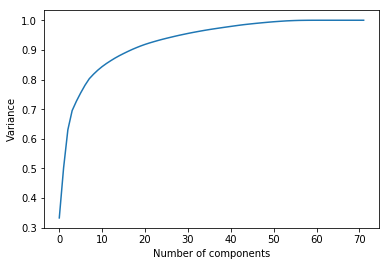

In [16]:
# PCA variance graph
from sklearn.decomposition import PCA

pca = PCA().fit(train_df_processed.drop(not_categorical_cols,axis=1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')

In [ ]:
# Using TSNE for clustering
# from sklearn.manifold import TSNE
# x_embedded = TSNE(n_components=2).fit_transform(df_categorical)
# print(x_embedded.shape)

Age                   float64
Customer_Seniority    float64
Household_Income      float64
dtype: object


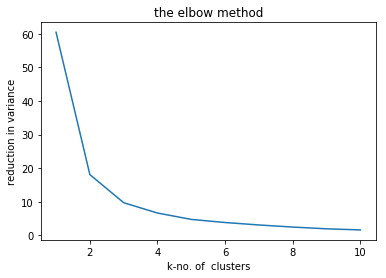

In [23]:
# K means
print(df_numeric.dtypes)
X=df_numeric.iloc[:10000,:].values

from sklearn.cluster import KMeans

wc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wc.append(kmeans.inertia_)
plt.plot(range(1,11), wc)
plt.title('the elbow method')
plt.xlabel('k-no. of  clusters')
plt.ylabel('reduction in variance')
plt.show()

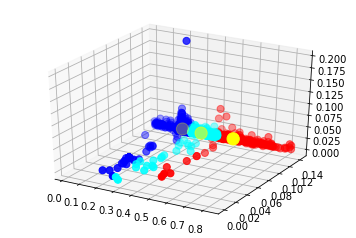

In [24]:
kmeans=KMeans(n_clusters=3,random_state=0)
y_kmeans=kmeans.fit_predict(X)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

from mpl_toolkits.mplot3d import Axes3D
ax.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],X[y_kmeans==0,2],s=50,c='red', label="cluster1")
ax.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],X[y_kmeans==1,2],s=50,c='blue', label="cluster2")
ax.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],X[y_kmeans==2,2],s=50,c='cyan', label="cluster3")


# plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],X[y_kmeans==0,2],s=50,c='red', label="cluster1")
# plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],X[y_kmeans==1,2],s=50,c='blue', label="cluster2")
# plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],X[y_kmeans==2,2],s=50,c='cyan', label="cluster3")
ax.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],X[y_kmeans==3,2],s=50,c='orange', label="cluster4")
ax.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1],X[y_kmeans==4,2],s=50,c='black', label="cluster5")
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=150,c='yellow', label="centroids")
# plt.title("cluster of customers")
# plt.xlabel("age")
# plt.ylabel("household income")
plt.show()


In [29]:
train_df_processed.reset_index(drop=True,inplace=True)
y = train_data[y].reset_index(drop=True)

In [30]:
train_df_processed = pd.concat([train_df_processed,y],axis=1)

In [31]:
train_df_processed.isnull().sum()

Date                                        0
Date_Acc_Open                               0
Customer_Code                               0
Age                                         0
Customer_Seniority                          0
Household_Income                            0
New_customer_index                          0
Residence_Index_N                           0
Residence_Index_S                           0
Foreigner_Index_N                           0
Foreigner_Index_S                           0
Activity_Index_0.0                          0
Activity_Index_1.0                          0
Sex_H                                       0
Sex_V                                       0
Province_Name_ALAVA                         0
Province_Name_ALBACETE                      0
Province_Name_ALICANTE                      0
Province_Name_ALMERIA                       0
Province_Name_ASTURIAS                      0
Province_Name_AVILA                         0
Province_Name_BADAJOZ             

In [32]:
# Save the data which is relevant, normalized and one-hot encoded
train_df_processed.to_pickle("train_processed_2_months.pkl")

In [32]:
train_df_processed.columns

Index(['Date', 'Date_Acc_Open', 'Customer_Code', 'Age', 'Customer_Seniority',
       'Household_Income', 'New_customer_index', 'Activity_Index_0.0',
       'Activity_Index_1.0', 'Customer_Relation_Type_Beginning_Month_A',
       'Customer_Relation_Type_Beginning_Month_I',
       'Customer_Relation_Type_Beginning_Month_N',
       'Customer_Relation_Type_Beginning_Month_P',
       'Customer_Relation_Type_Beginning_Month_R', 'Province_Name_ALAVA',
       'Province_Name_ALBACETE', 'Province_Name_ALICANTE',
       'Province_Name_ALMERIA', 'Province_Name_ASTURIAS',
       'Province_Name_AVILA', 'Province_Name_BADAJOZ',
       'Province_Name_BALEARS, ILLES', 'Province_Name_BARCELONA',
       'Province_Name_BIZKAIA', 'Province_Name_BURGOS',
       'Province_Name_CACERES', 'Province_Name_CADIZ',
       'Province_Name_CANTABRIA', 'Province_Name_CASTELLON',
       'Province_Name_CEUTA', 'Province_Name_CIUDAD REAL',
       'Province_Name_CORDOBA', 'Province_Name_CORUÑA, A',
       'Province_Name_C

In [4]:
features = ['Age', 'Customer_Seniority', 'Household_Income', 'Residence_Index_N',
       'Residence_Index_S', 'Foreigner_Index_N', 'Foreigner_Index_S',
       'Activity_Index_0.0', 'Activity_Index_1.0', 'Sex_H', 'Sex_V',
       'Province_Name_ALAVA', 'Province_Name_ALBACETE',
       'Province_Name_ALICANTE', 'Province_Name_ALMERIA',
       'Province_Name_ASTURIAS', 'Province_Name_AVILA',
       'Province_Name_BADAJOZ', 'Province_Name_BALEARS, ILLES',
       'Province_Name_BARCELONA', 'Province_Name_BIZKAIA',
       'Province_Name_BURGOS', 'Province_Name_CACERES', 'Province_Name_CADIZ',
       'Province_Name_CANTABRIA', 'Province_Name_CASTELLON',
       'Province_Name_CEUTA', 'Province_Name_CIUDAD REAL',
       'Province_Name_CORDOBA', 'Province_Name_CORUÑA, A',
       'Province_Name_CUENCA', 'Province_Name_GIPUZKOA',
       'Province_Name_GIRONA', 'Province_Name_GRANADA',
       'Province_Name_GUADALAJARA', 'Province_Name_HUELVA',
       'Province_Name_HUESCA', 'Province_Name_JAEN', 'Province_Name_LEON',
       'Province_Name_LERIDA', 'Province_Name_LUGO', 'Province_Name_MADRID',
       'Province_Name_MALAGA', 'Province_Name_MELILLA', 'Province_Name_MURCIA',
       'Province_Name_NAVARRA', 'Province_Name_OURENSE',
       'Province_Name_PALENCIA', 'Province_Name_PALMAS, LAS',
       'Province_Name_PONTEVEDRA', 'Province_Name_RIOJA, LA',
       'Province_Name_SALAMANCA', 'Province_Name_SANTA CRUZ DE TENERIFE',
       'Province_Name_SEGOVIA', 'Province_Name_SEVILLA', 'Province_Name_SORIA',
       'Province_Name_TARRAGONA', 'Province_Name_TERUEL',
       'Province_Name_TOLEDO', 'Province_Name_VALENCIA',
       'Province_Name_VALLADOLID', 'Province_Name_ZAMORA',
       'Province_Name_ZARAGOZA', 'Saving_Account', 'Guarantees',
       'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
       'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
       'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions2', 'Direct_Debit']

In [6]:
train_data.columns

Index(['Date', 'Customer_Code', 'Customers_Country_Residence', 'Sex', 'Age',
       'Date_Acc_Open', 'New_customer_index', 'Customer_Seniority',
       'Primary_Customer', 'Customer_Type_Beginning_Month',
       'Customer_Relation_Type_Beginning_Month', 'Residence_Index',
       'Foreigner_Index', 'Channel_Customer_join', 'Deceased_Index',
       'Address_Type', 'Province_Code', 'Province_Name', 'Activity_Index',
       'Household_Income', 'Segmentation', 'Saving_Account', 'Guarantees',
       'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
       'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
       'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions2', 'Direct_Debit'],
      dtype='object')

In [8]:
train_data.corr()['Household_Income'].sort_values()

Customer_Code                   -0.082736
New_customer_index              -0.013953
Customer_Type_Beginning_Month    0.000229
Age                              0.067448
Household_Income                 1.000000
Address_Type                          NaN
Name: Household_Income, dtype: float64